In [1]:
import pandas as pd
import os

# Actual

In [2]:
data_frames=[]
for i in range(0,31):
    df=pd.read_excel(r'E:\Desktop\Datasets\actual_july\15 min Dispatch July 2020.xlsx',sheet_name=i) 

    temp=list(df.columns)

    date = temp[8].date()
    df.columns = df.iloc[0]
    df=df.drop(0)
    df=df.drop(columns=df.columns[-3:],axis=1)
    x=df.iloc[:, 0]

    t=0
    for i in x:
        t=t+1
        if i=='Total MW':

            break
    df=df.iloc[:t-1, :]
    df1 = pd.DataFrame()
    import datetime as dt
    t1 = dt.datetime.strptime('00:00:00', '%H:%M:%S')
    for i in range (1,len(df.columns),2):
        df1[str(t1.time())]=df.iloc[:, i]+df.iloc[:, i+1]
        t2 = dt.datetime.strptime('00:30:00', '%H:%M:%S')
        time_zero = dt.datetime.strptime('00:00:00', '%H:%M:%S')
        x=(t1 - time_zero + t2).time()
        t1 = dt.datetime.strptime(str(x), '%H:%M:%S')
        
    m=df.iloc[:t-1, 0]
    list(m)
    df1.insert(0, 'Power_Plant', m)
    df2=pd.melt(df1,id_vars=['Power_Plant'])
    df2['Date']=date
    data_frames.append(df2)


In [3]:
#merge all the dataframes(all days)
from functools import reduce
df_merged_1 = reduce(lambda  left,right: pd.merge(left,right,how='outer'), data_frames)
df_merged_1.shape

(54144, 4)

In [4]:
df_merged_1.head()

,Power_Plant,variable,value,Date
0,Canyon,00:00:00,20.0,2020-07-01
1,WPS,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,91.0,2020-07-01
4,Polp,00:00:00,40.0,2020-07-01


In [5]:
df_merged_1=df_merged_1.rename(columns = {'Power_Plant':'Plant','variable':'Time','value':'Actual_Dispatch'}) #renaming...

In [6]:
df_merged_1.head()

,Plant,Time,Actual_Dispatch,Date
0,Canyon,00:00:00,20.0,2020-07-01
1,WPS,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,91.0,2020-07-01
4,Polp,00:00:00,40.0,2020-07-01


In [7]:
#set the index column...
df_reset_1=df_merged_1.set_index('Plant')
df_reset_1.head()

,Time,Actual_Dispatch,Date
Plant,,,
Canyon,00:00:00,20.0,2020-07-01
WPS,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,91.0,2020-07-01
Polp,00:00:00,40.0,2020-07-01


In [8]:
#renaming a plant(similar name as forecast dispatch)...
df_new_1 = df_reset_1.rename(index={'Canyon':'Cany'})
df_new_1.head()

,Time,Actual_Dispatch,Date
Plant,,,
Cany,00:00:00,20.0,2020-07-01
WPS,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,91.0,2020-07-01
Polp,00:00:00,40.0,2020-07-01


# Forecast

In [9]:
#get all the files in the forecast folder..........
def fileList(path):
    listOfFiles = os.listdir(path)
    files=[]
    
    for file in listOfFiles:
        fullPath = os.path.join(path, file) #full path for the file
        if os.path.isdir(fullPath): #if there are sub folders.....
            files = files + fileList(fullPath) #recursively loop through the sub folder
        else:
            files.append(fullPath)
                
    return files

all_the_files=fileList(r'E:\Desktop\forcast_july')

In [10]:
##############
data_frames=[]
for file in all_the_files:
    df=pd.read_excel(file)
    df.columns = df.iloc[0] #make columns as 0th row items..
    columns=df.columns
    date=columns[1].date() 
    df=df.drop(0) #drop 0th row items
    df.columns = df.iloc[0] #make columns as 0th row items..
    df=df.drop(1)  #drop 1st row items
    plants_temp=df.iloc[:,0] #all the items in plant column(this includes unnessasary items)
    plants=[]
    #get only the correct plants...
    for plant in plants_temp:
        if plant=='Total Generation':
            break
        else:
            plants.append(plant)
    df = df.loc[:, df.columns.notnull()] #remove nan columns.............
    z=len(plants) #only get the relevant rows...............
    df=df.head(z) #only get the dataframe which contains the needed rows...
    df.insert(0, 'Power_Plant', plants)
    df=df.drop(columns=df.columns[-1:],axis=1) #drop the last column.......
    df=pd.melt(df,id_vars=['Power_Plant']) #reshape the df using melt function...
    df['Date']=date
    data_frames.append(df)

In [11]:
#merge all the dataframes of all the days...
from functools import reduce
df_merged_2 = reduce(lambda  left,right: pd.merge(left,right,how='outer'), data_frames)
df_merged_2.shape

(62352, 4)

In [12]:
df_merged_2.head()

,Power_Plant,1,value,Date
0,WPS,00:00:00,0.0,2020-07-01
1,Cany,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,60.636,2020-07-01
4,Polp,00:00:00,78.479,2020-07-01


In [13]:
df_merged_2=df_merged_2.rename(columns = {'Power_Plant':'Plant',1:'Time','value':'Forecast_Distpatch'}) #rename columns...

In [14]:
df_merged_2.head()

,Plant,Time,Forecast_Distpatch,Date
0,WPS,00:00:00,0.0,2020-07-01
1,Cany,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,60.636,2020-07-01
4,Polp,00:00:00,78.479,2020-07-01


In [15]:
#set the index column...
df_reset_2=df_merged_2.set_index('Plant')
df_reset_2.head(50)

,Time,Forecast_Distpatch,Date
Plant,,,
WPS,00:00:00,0.0,2020-07-01
Cany,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,60.636,2020-07-01
Polp,00:00:00,78.479,2020-07-01
UKPS,00:00:00,0.0,2020-07-01
Koth,00:00:00,32.876,2020-07-01
Victoria,00:00:00,0.0,2020-07-01
Rand,00:00:00,0.0,2020-07-01


In [16]:
#renaming a plant...
df_new_2 = df_reset_2.rename(index={'UKPS':'Upper Kothmale','Victoria':'Vict','Sama':'Sam','Uthuru_Janani':'Uthuru Janani','Ace (Embilipitiya)':'ACE EMBP','ACE (Matara)':'ACE Matara','VPOWER_Hamb':'VPOWER Hamb.','VPOWER_Palle':'VPOWER Palle.','VPOWER_Horana':'VPOWER Horana','ALTAAQ_Polon':'ALTAQQA-Pol.','ALTAAQ_Mahiya':'ALTAQQA-Mahi.','Solar':'Solar**','Wind':'Wind**','Mini Hydro***':'CEB/IPP Mini Hydro***'})
df_new_2.head()

,Time,Forecast_Distpatch,Date
Plant,,,
WPS,00:00:00,0.0,2020-07-01
Cany,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,60.636,2020-07-01
Polp,00:00:00,78.479,2020-07-01


#CALCULATE THE DIFFERENCE.....

In [17]:
df_new_1.head()

,Time,Actual_Dispatch,Date
Plant,,,
Cany,00:00:00,20.0,2020-07-01
WPS,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,91.0,2020-07-01
Polp,00:00:00,40.0,2020-07-01


In [18]:
df_new_2.head()

,Time,Forecast_Distpatch,Date
Plant,,,
WPS,00:00:00,0.0,2020-07-01
Cany,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,60.636,2020-07-01
Polp,00:00:00,78.479,2020-07-01


In [19]:
#set the index column
df_new_3 = df_new_1.reset_index()
df_new_4 = df_new_2.reset_index()

In [20]:
df_new_3.head()

,Plant,Time,Actual_Dispatch,Date
0,Cany,00:00:00,20.0,2020-07-01
1,WPS,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,91.0,2020-07-01
4,Polp,00:00:00,40.0,2020-07-01


In [21]:
df_new_4.head()

,Plant,Time,Forecast_Distpatch,Date
0,WPS,00:00:00,0.0,2020-07-01
1,Cany,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,60.636,2020-07-01
4,Polp,00:00:00,78.479,2020-07-01


In [22]:
df_new_3.dtypes

Plant              object
Time               object
Actual_Dispatch    object
Date               object
dtype: object

In [23]:
df_new_3.dtypes

Plant              object
Time               object
Actual_Dispatch    object
Date               object
dtype: object

In [24]:
df_new_3['Plant']=df_new_3['Plant'].astype('string')
df_new_3['Actual_Dispatch'] = df_new_3['Actual_Dispatch'].astype(float)
df_new_3['Time']=df_new_3['Time'].astype('string')
df_new_3['Date']=df_new_3['Date'].astype('string')

In [25]:
df_new_4['Plant']=df_new_4['Plant'].astype('string')
df_new_4['Forecast_Distpatch'] = df_new_4['Forecast_Distpatch'].astype(float)
df_new_4['Time']=df_new_4['Time'].astype('string')
df_new_4['Date']=df_new_4['Date'].astype('string')

In [26]:
df_new_3.dtypes

Plant               string
Time                string
Actual_Dispatch    float64
Date                string
dtype: object

In [27]:
df_new_4.dtypes

Plant                  string
Time                   string
Forecast_Distpatch    float64
Date                   string
dtype: object

In [28]:
df_new_3.head()

,Plant,Time,Actual_Dispatch,Date
0,Cany,00:00:00,20.0,2020-07-01
1,WPS,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,91.0,2020-07-01
4,Polp,00:00:00,40.0,2020-07-01


In [29]:
df_new_4.head()

,Plant,Time,Forecast_Distpatch,Date
0,WPS,00:00:00,0.000,2020-07-01
1,Cany,00:00:00,0.000,2020-07-01
2,Olax,00:00:00,10.000,2020-07-01
3,Nlax,00:00:00,60.636,2020-07-01
4,Polp,00:00:00,78.479,2020-07-01


In [30]:
dfinal = df_new_3.merge(df_new_4, on=['Plant','Date','Time'], how = 'inner')

In [31]:
dfinal.head()

,Plant,Time,Actual_Dispatch,Date,Forecast_Distpatch
0,Nlax,00:00:00,91.0,2020-07-01,60.636
1,Polp,00:00:00,40.0,2020-07-01,78.479
2,Upper Kothmale,00:00:00,0.0,2020-07-01,0.000
3,Koth,00:00:00,96.0,2020-07-01,32.876
4,Vict,00:00:00,0.0,2020-07-01,0.000


In [32]:
#get the difference
for i in range (0,len(dfinal.columns)):
    dfinal['Difference']=dfinal['Actual_Dispatch']-dfinal['Forecast_Distpatch'] #add column names as time.....
dfinal.head()

,Plant,Time,Actual_Dispatch,Date,Forecast_Distpatch,Difference
0,Nlax,00:00:00,91.0,2020-07-01,60.636,30.364
1,Polp,00:00:00,40.0,2020-07-01,78.479,-38.479
2,Upper Kothmale,00:00:00,0.0,2020-07-01,0.000,0.000
3,Koth,00:00:00,96.0,2020-07-01,32.876,63.124
4,Vict,00:00:00,0.0,2020-07-01,0.000,0.000


In [33]:
dfinal=dfinal.reindex(columns=['Plant','Date','Time', 'Actual_Dispatch','Forecast_Distpatch','Difference'])
dfinal.head()

,Plant,Date,Time,Actual_Dispatch,Forecast_Distpatch,Difference
0,Nlax,2020-07-01,00:00:00,91.0,60.636,30.364
1,Polp,2020-07-01,00:00:00,40.0,78.479,-38.479
2,Upper Kothmale,2020-07-01,00:00:00,0.0,0.000,0.000
3,Koth,2020-07-01,00:00:00,96.0,32.876,63.124
4,Vict,2020-07-01,00:00:00,0.0,0.000,0.000


In [34]:
dfinal.shape

(29808, 6)

In [35]:
import matplotlib.pyplot as plt #import vizualization library..

In [36]:
a=dfinal['Actual_Dispatch'].tolist()

In [40]:
b=dfinal['Forecast_Distpatch'].tolist()

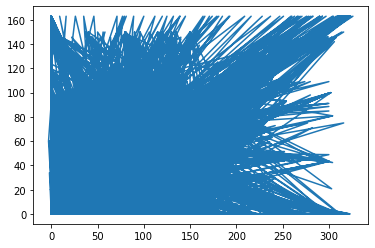

In [42]:
plt.plot(a,b)
plt.show()

In [43]:
dfinal.head(60)

,Plant,Date,Time,Actual_Dispatch,Forecast_Distpatch,Difference
0,Nlax,2020-07-01,00:00:00,91.0,60.6360,30.3640
1,Polp,2020-07-01,00:00:00,40.0,78.4790,-38.4790
2,Upper Kothmale,2020-07-01,00:00:00,0.0,0.0000,0.0000
3,Koth,2020-07-01,00:00:00,96.0,32.8760,63.1240
4,Vict,2020-07-01,00:00:00,0.0,0.0000,0.0000
5,Rand,2020-07-01,00:00:00,0.0,0.0000,0.0000
6,Rant,2020-07-01,00:00:00,0.0,0.0000,0.0000
7,Uku,2020-07-01,00:00:00,72.0,40.0000,32.0000
8,Bowa,2020-07-01,00:00:00,0.0,0.0000,0.0000
9,Sam,2020-07-01,00:00:00,0.0,0.0000,0.0000


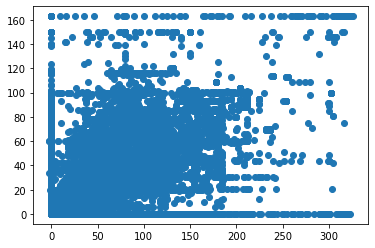

In [44]:
plt.scatter(a,b)
plt.show()

In [46]:
#Actual Dispatch mean
dfinal['Actual_Dispatch'].mean()

48.39737976445033

In [47]:
#Forecast Dispatch mean
dfinal['Forecast_Distpatch'].mean()

24.508283751143576

In [48]:
#difference mean
dfinal['Difference'].mean()

23.77349527020036

In [45]:
#summary of the data........
dfinal.describe()

,Actual_Dispatch,Forecast_Distpatch,Difference
count,29463.000000,29808.000000,29463.000000
mean,48.397380,24.508284,23.773495
std,63.045731,32.869114,47.294093
min,-3.000000,0.000000,-163.000000
25%,0.000000,0.000000,0.000000
50%,29.000000,13.140000,3.528000
75%,76.000000,40.000000,42.000000
max,326.000000,163.000000,323.000000


In [64]:
#groupby plant....
newFinal=dfinal.groupby(by='Plant')
newFinal.first() #show the first entry in each group.....

,Date,Time,Actual_Dispatch,Forecast_Distpatch,Difference
Plant,,,,,
ACE EMBP,2020-07-01,00:00:00,0.0,51.1086,-51.1086
ACE Matara,2020-07-01,00:00:00,0.0,0.0000,0.0000
ALTAQQA-Mahi.,2020-07-01,00:00:00,0.0,0.0000,0.0000
ALTAQQA-Pol.,2020-07-01,00:00:00,0.0,0.0000,0.0000
Asia Power,2020-07-01,00:00:00,0.0,32.9000,-32.9000
Barge,2020-07-01,00:00:00,90.0,45.0000,45.0000
Bowa,2020-07-01,00:00:00,0.0,0.0000,0.0000
CEB/IPP Mini Hydro***,2020-07-01,00:00:00,131.0,58.0000,73.0000
Koth,2020-07-01,00:00:00,96.0,32.8760,63.1240
